In [1]:
import tf_deepRL as drl
from tf_deepRL.env import load_env
from tf_deepRL.agents.policy_gradient import VPG
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
env = load_env(provider="OpenAI-gym", name="CartPole-v0", virtual_display=True)

In [3]:
def cartpole_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=64, activation='relu'),
      tf.keras.layers.Dense(units=32, activation='relu'),
      tf.keras.layers.Dense(env.action_space, activation=None)
    ])
    return model

model = cartpole_model()

In [4]:
agent = VPG(model, env)

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
history = agent.train(opt, episodes=700, status_type="text", status_interval=100)

Episode: 100/700
[===========================] - 0s 176ms/episode - rewards: 23.06
Episode: 200/700
[===========================] - 0s 178ms/episode - rewards: 30.26
Episode: 300/700
[===========================] - 0s 266ms/episode - rewards: 43.72
Episode: 400/700
[===========================] - 0s 562ms/episode - rewards: 70.64
Episode: 500/700
[===========================] - 0s 266ms/episode - rewards: 42.07
Episode: 600/700
[===========================] - 0s 484ms/episode - rewards: 92.73
Episode: 700/700
[===========================] - 0s 771ms/episode - rewards: 115.0


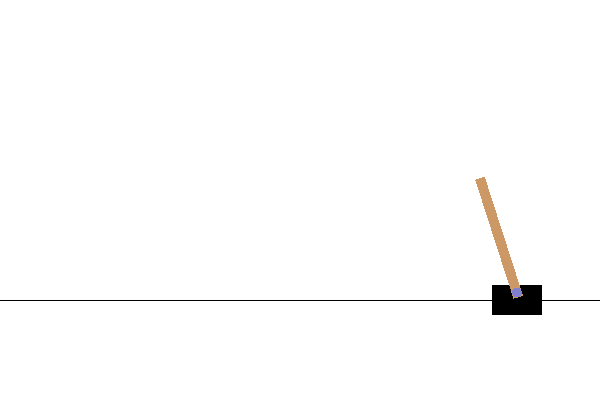

True

In [6]:
agent.play(max_steps=100, stop_when_finish=False)